In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 11, 14]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject="Harold")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Harold/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
(8544, 4, 14, 1) (8544,) (86, 4, 14, 1) (86,)
Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
second (8544, 4, 14, 1) (8544,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 93.45%
Maximum validation accuracy : 96.51%
Accuracy of test dataset using model V0: 96.5116%
Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.7679%
Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.1854%
Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.0554%
Dataset 6/18 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 79.4592%
Dataset 7/18 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.5463%
Dataset 8/18 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 75.6596%
Dataset 9/18 - Session Exp_2025-07-17-v1/E9AD0

In [2]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '11', '14']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Harold/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Harold"

In [10]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)


Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 92.61%
Maximum validation accuracy : 94.11%

Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.79%
Maximum validation accuracy : 91.53%

Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 91.93%
Maximum validation accuracy : 95.08%

Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.92%
Maximum validation accuracy : 93.05%

Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.11%
Maximum validatio

In [11]:
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_Harold/Train_Test_per_sessions.csv', index=False)

In [12]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 12.37%
Average of acc using previous test data after training: 88.14%
Average of acc using current test data after training: 92.86%
K-1: 81.84% | Target: 92.79
K-4: 90.12% | Target: 92.70
K-7: 93.42% | Target: 92.73
K-11: 95.49% | Target: 92.97
K-14: 96.57% | Target: 93.88


In [44]:
np.array(baseline_result['Info'])

array(['Stand (7/9)', 'Sit_chair (7/9)', 'Stand (7/10)',
       'Sit_chair (7/10)', 'Stand (7/11)', 'Sit_chair (7/11)',
       'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)',
       'Sit_chair (7/17)', 'Stand (7/23)', 'Sit_chair (7/23)',
       'Stand (7/24)', 'Sit_chair (7/24)', 'Stand (7/25)',
       'Sit_chair (7/25)', 'Stand (8/1)', 'Sit_chair (8/1)'], dtype=object)

In [46]:
Trained_acc_all

[0.941135585308075,
 0.9152777791023254,
 0.9508234858512878,
 0.930475115776062,
 0.9108933806419373,
 0.9480158090591431,
 0.9175925850868225,
 0.9652112722396851,
 0.9186181426048279,
 0.885800302028656,
 0.9232192635536194,
 0.9246114492416382,
 0.8903315663337708,
 0.9378334283828735,
 0.9425260424613953,
 0.9673384428024292,
 0.9341830611228943,
 0.911168098449707]

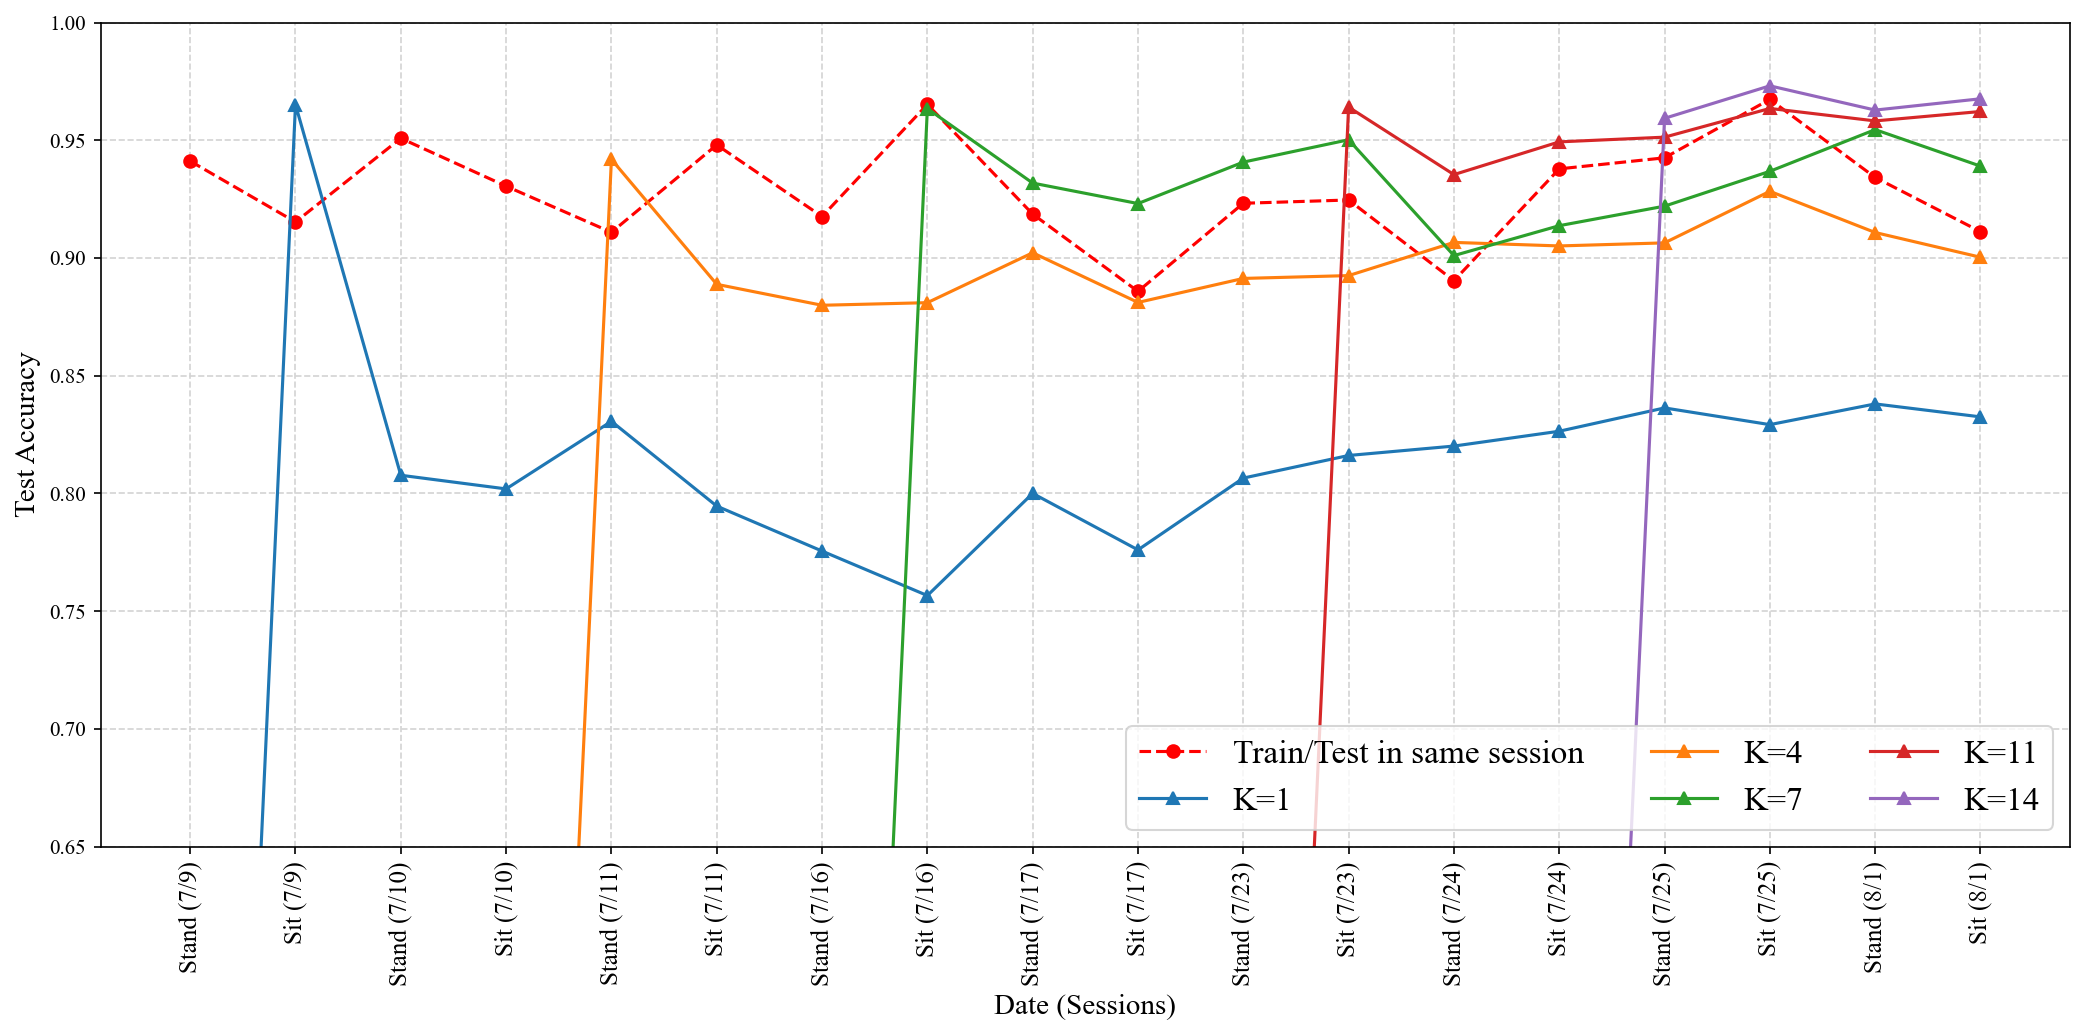

In [50]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.941135585308075, 0.9152777791023254, 0.9508234858512878, 0.930475115776062, 0.9108933806419373, 0.9480158090591431, 0.9175925850868225, 0.9652112722396851, 0.9186181426048279, 0.885800302028656, 0.9232192635536194, 0.9246114492416382, 0.8903315663337708, 0.9378334283828735, 0.9425260424613953, 0.9673384428024292, 0.9341830611228943, 0.911168098449707]

X_labels = ['Stand (7/9)', 'Sit (7/9)', 'Stand (7/10)', 'Sit (7/10)', 'Stand (7/11)', 'Sit (7/11)', 'Stand (7/16)', 'Sit (7/16)', 'Stand (7/17)', 'Sit (7/17)',
            'Stand (7/23)', 'Sit (7/23)', 'Stand (7/24)', 'Sit (7/24)', 'Stand (7/25)', 'Sit (7/25)', 'Stand (8/1)', 'Sit (8/1)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

#plt.ylim([0, 1])
plt.ylim([0.65, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=3)
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()